In this notebook, we provide a supproting function to read all the data and visualize them, in order to explore their patterns.

In [1]:
import os
import pandas as pd

def combine_csv(folder_path, test_condition):
    """
    Combine all CSV files in a folder into a single DataFrame.
    :param folder_path: Path to the folder containing the CSV files
    :param seq_idx: Sequence index
    :param label: Label of the sequence (Normal - 0, Abnormal - 1)
    :return: A single DataFrame containing all the data from the CSV files
    """

    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Create an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate over the CSV files in the folder
    for file in csv_files:
        # Construct the full path to each CSV file
        file_path = os.path.join(folder_path, file)

        # Read each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Drop the time. Will add later.
        df = df.drop(labels=df.columns[0], axis=1)

        # Extract the file name (excluding the extension) to use as a prefix
        file_name = os.path.splitext(file)[0]

        # Add a prefix to each column based on the file name
        df = df.add_prefix(f'{file_name}_')

        # Concatenate the current DataFrame with the combined DataFrame
        combined_df = pd.concat([combined_df, df], axis=1)

    df = pd.read_csv(file_path)
    combined_df = pd.concat([df['time'], combined_df], axis=1)
    combined_df.loc[:, 'test_condition'] = test_condition

    return combined_df
        

In [12]:
# Read the data
path_training = ['static_with_fault_1', 'static_with_fault_2', 'static_with_fault_3', 
'static_with_fault_4', 'static_with_fault_5', 'static_with_fault_6', 
'steady_state_after_movement', 'steady_state_not_moving', 'task_normal', 'task_fault'
]

# path_header = '../data_collection/collected_data/'
path_header = os.path.abspath('../data_collection/collected_data/')

df = pd.DataFrame()
for tmp_path in path_training:
    # path = path_header + tmp_path
    path = path_header + '/' + tmp_path
    tmp_df = combine_csv(path, tmp_path)
    df = pd.concat([df, tmp_df])
    df = df.reset_index(drop=True)

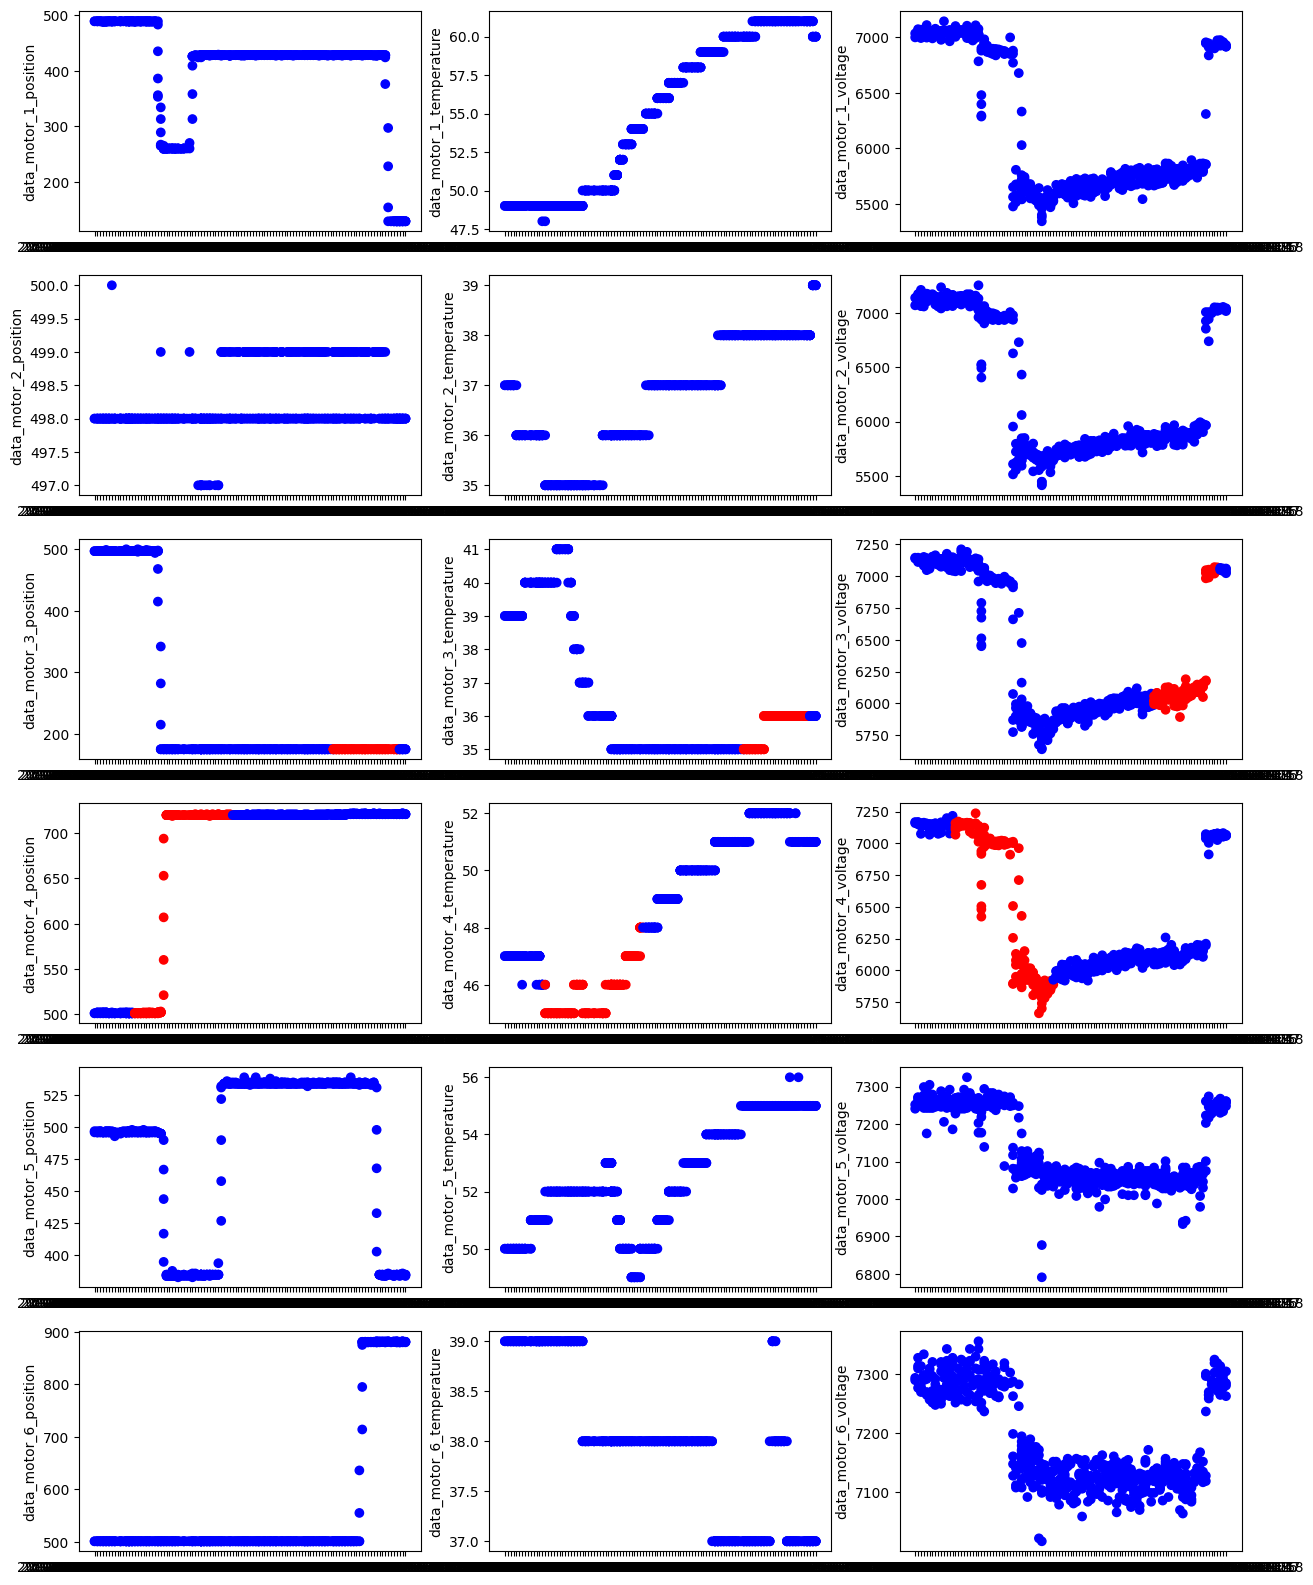

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Change the file name to the one you want to visualize.
selected_sequence_idx = 'task_fault'
filtered_df = df[df['test_condition'] == selected_sequence_idx]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
for ax, col in zip(axes.flat, ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage', 
    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']):
    motor_num = col.split('_')[2]
    label_col = f'data_motor_{motor_num}_label'
    ax.scatter(filtered_df['time'], filtered_df[col], c=filtered_df[label_col].map({0: 'blue', 1: 'red'}), marker='o', label=col)
    ax.set_ylabel(col)
plt.show()